In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np

import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from cataclop.ml import preprocessing
from cataclop.ml import exploration

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline import factories

In [2]:
program = factories.Program.factory('2020-05-25', version='1.2')

In [3]:
program.train(dataset_params = {
    'from': '2017-01-01',
    'to': '2020-01-01',
    'countries': ['FRA'],
    'categories': ['PLAT'],
    'sub_categories': ['HANDICAP', 'HANDICAP_DIVISE']
}, model_params = {
    'seed': 123456,
    'kfolds': 2,
    'nan_flag': -10000,
    'n_targets': 1,
}, dataset_reload=True, model='2020-05-25', dataset='2020-05-25')

3520 races


preparing model data
training xgb_10


[11:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.140416165657689
training xgb_30


[11:11:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.686433922442058
training xgb_50


[11:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.886008269049263
training mlp_2
mea: 6.701941418700532
training mlp_5
mea: 8.922562919697732
training mlp_10
mea: 16.381553163426428
training mlp_30
mea: 19.056404751730838
training xgb_10


[11:11:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.2895385029282
training xgb_30


[11:11:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.643127656814259
training xgb_50


[11:11:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mea: 6.8061272745673875
training mlp_2
mea: 31.255788486050086
training mlp_5
mea: 43.88219973623497
training mlp_10
mea: 36.07039553714999
training mlp_30
mea: 68.38469281917871


In [4]:
program.df.describe()

,id,race_id,age,num,race_count,victory_count,placed_count,placed_2_count,placed_3_count,earnings,victory_earnings,placed_earnings,year_earnings,prev_year_earnings,post_position,position,handicap_weight,handicap_distance,trueskill_mu,trueskill_sigma,hist_1_days,hist_2_days,hist_3_days,winner_dividend,placed_dividend,final_odds,final_odds_offline,final_odds_unibet,final_odds_ref,final_odds_ref_offline,final_odds_ref_unibet,trainer_winning_rate,trainer_avg_winning_dividend,horse_id,trainer_id,jockey_id,herder_id,owner_id,num_race,num_bis,prize,distance,declared_player_count,session_id,num_session,hippodrome_id,hist_1_pos,hist_2_pos,hist_3_pos,hist_4_pos,hist_5_pos,hist_6_pos,speed,win,final_odds_ref_inv,race_count_mean,race_count_std,race_count_amin,race_count_amax,hist_1_pos_mean,hist_1_pos_std,hist_1_pos_amin,hist_1_pos_amax,hist_2_pos_mean,hist_2_pos_std,hist_2_pos_amin,hist_2_pos_amax,hist_3_pos_mean,hist_3_pos_std,hist_3_pos_amin,hist_3_pos_amax,victory_count_mean,victory_count_std,victory_count_amin,victory_count_amax,placed_2_count_mean,placed_2_count_std,placed_2_count_amin,placed_2_count_amax,placed_3_count_mean,placed_3_count_std,placed_3_count_amin,placed_3_count_amax,victory_earnings_mean,victory_earnings_std,victory_earnings_amin,victory_earnings_amax,placed_earnings_mean,placed_earnings_std,placed_earnings_amin,placed_earnings_amax,prev_year_earnings_mean,prev_year_earnings_std,prev_year_earnings_amin,prev_year_earnings_amax,handicap_distance_mean,handicap_distance_std,handicap_distance_amin,handicap_distance_amax,handicap_weight_mean,handicap_weight_std,handicap_weight_amin,handicap_weight_amax,final_odds_ref_mean,final_odds_ref_std,final_odds_ref_amin,final_odds_ref_amax,final_odds_ref_offline_mean,final_odds_ref_offline_std,final_odds_ref_offline_amin,final_odds_ref_offline_amax,race_count_r,hist_1_pos_r,hist_2_pos_r,hist_3_pos_r,victory_count_r,placed_2_count_r,placed_3_count_r,victory_earnings_r,placed_earnings_r,prev_year_earnings_r,handicap_distance_r,handicap_weight_r,final_odds_ref_r,final_odds_ref_offline_r,race_winner_dividend,odds_0,odds_1,odds_2,odds_3,odds_4,odds_5,odds_6,odds_7,odds_8,odds_9,odds_10,odds_11,odds_12,odds_13,odds_14,odds_15,odds_16,odds_17,odds_18,odds_19,target_returns,target,pred_xgb_10_1,pred_xgb_30_1,pred_xgb_50_1,pred_mlp_2_1,pred_mlp_5_1,pred_mlp_10_1,pred_mlp_30_1
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,4.382500e+04,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,42205.000000,43825.000000,43825.0,43825.000000,43825.000000,2447.000000,1879.000000,1621.000000,43825.000000,43825.000000,43102.000000,26503.000000,26344.000000,43825.000000,43825.000000,26308.00000,43219.000000,40381.000000,43825.000000,43825.000000,43825.000000,38364.000000,43824.000000,43825.000000,31664.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.0,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.0,43825.0,43825.0,43825.0,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.0,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,438

In [5]:
program.model.features

['declared_player_count',
 'handicap_distance',
 'handicap_distance_amax',
 'handicap_distance_amin',
 'handicap_distance_mean',
 'handicap_distance_r',
 'handicap_distance_std',
 'handicap_weight',
 'handicap_weight_amax',
 'handicap_weight_amin',
 'handicap_weight_mean',
 'handicap_weight_r',
 'handicap_weight_std',
 'hist_1_pos',
 'hist_1_pos_amax',
 'hist_1_pos_amin',
 'hist_1_pos_mean',
 'hist_1_pos_r',
 'hist_1_pos_std',
 'hist_2_pos',
 'hist_2_pos_amax',
 'hist_2_pos_amin',
 'hist_2_pos_mean',
 'hist_2_pos_r',
 'hist_2_pos_std',
 'hist_3_pos',
 'hist_3_pos_amax',
 'hist_3_pos_amin',
 'hist_3_pos_mean',
 'hist_3_pos_r',
 'hist_3_pos_std',
 'hist_4_pos',
 'hist_5_pos',
 'hist_6_pos',
 'odds_0',
 'odds_1',
 'odds_2',
 'odds_3',
 'odds_4',
 'odds_5',
 'odds_6',
 'odds_7',
 'odds_8',
 'odds_9',
 'placed_2_count',
 'placed_2_count_amax',
 'placed_2_count_amin',
 'placed_2_count_mean',
 'placed_2_count_r',
 'placed_2_count_std',
 'placed_3_count',
 'placed_3_count_amax',
 'placed_3_cou

In [6]:
print('{} samples, {} features'.format(program.df.shape[0], len(program.model.features)))

43825 samples, 87 features


In [7]:
if not hasattr(program.model, 'stacked_models'):
    program.model.stacked_models = []
    program.df['target_stacked'] = 0

In [8]:
[model["name"] for model in program.model.models] + [model["name"] for model in program.model.stacked_models]

['xgb_10', 'xgb_30', 'xgb_50', 'mlp_2', 'mlp_5', 'mlp_10', 'mlp_30']

In [9]:
print(
    '{} races from {} to {}'.format(
        program.df.race_id.nunique(), 
        program.df.start_at.min(), 
        program.df.start_at.max()
    )
)

3344 races from 2017-01-01 15:47:00 to 2019-12-31 15:52:00


In [10]:
for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'classes_'):
        clf = model['estimators'][-1]['pipeline'].steps[-1][1]
        print(clf.classes_)

In [11]:
pd.set_option('precision',7)
    
for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")

if hasattr(program.model, "stacked_models"):
    for model in program.model.stacked_models:
        clf = model['estimators'][-1]['pipeline'].steps[-1][1]
        if hasattr(clf, 'feature_importances_'):
            fi = pd.Series(clf.feature_importances_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
            print(model['name'])
            print(fi.sort_values(ascending=False)[0:100])
            print("---\n")
        if hasattr(clf, 'coef_'):
            fi = pd.Series(clf.coef_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
            print(model['name'])
            print(fi.sort_values(ascending=False)[0:100])
            print("---\n")
        
pd.set_option('precision',7)



xgb_10
placed_3_count_amax                   0.1357702
placed_3_count_std                    0.1320576
race_count_mean                       0.1135918
odds_9                                0.0875282
placed_earnings_amax                  0.0849744
declared_player_count                 0.0583594
victory_earnings_std                  0.0553839
odds_8                                0.0516076
prev_year_earnings_std                0.0419296
hist_1_pos_mean                       0.0330229
odds_3                                0.0323055
odds_5                                0.0314731
victory_count_std                     0.0264488
placed_3_count_amin                   0.0248330
placed_2_count_std                    0.0207769
victory_earnings_amax                 0.0201192
odds_1                                0.0174214
odds_2                                0.0171436
victory_count_amax                    0.0152532
hist_3_pos_std                        0.0000000
hist_3_pos_amin                  

In [12]:
df = program.df

for model in program.model.models:
    print(model['name'], df['pred_{}_1'.format(model['name'])].mean())

xgb_10 7.716891366618059
xgb_30 11.217499351773476
xgb_50 11.703424122500815
mlp_2 23.701094360304882
mlp_5 22.77476036348242
mlp_10 19.592540483488225
mlp_30 32.87483230264085


In [13]:
from sklearn import preprocessing

df['pred_sum_1'] = 1
for model in program.model.models:
    m = model['name']
    #s = preprocessing.MinMaxScaler()
    #scaled = s.fit_transform(df[['pred_{}_1'.format(m)]].values)
    #df['pred_{}_s_1'.format(m)] = scaled
    #df['pred_sum_1'] = df['pred_sum_1'] * df['pred_{}_s_1'.format(m)]
    
df['pred_sum_1'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models]].sum(axis=1)
df['pred_sum_1'] /= len(program.model.models)

df['pred_stacked_sum_1'] = df[['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models]].sum(axis=1)
df['pred_stacked_sum_1'] /= len(program.model.stacked_models)

df['pred_odds_1'] = df['final_odds_ref']
df['pred_rnd_1'] = np.random.rand(df.shape[0])
df['pred_trueskill_mu_1'] = df['trueskill_mu']

In [14]:
cols = [
            'position', 
            'declared_player_count', 
            'sub_category', 
            'num', 
            'final_odds', 
            'final_odds_ref', 
            'final_odds_ref_unibet', 
            'target',
            'target_stacked',
            'pred_sum_1',
            'pred_stacked_sum_1',
            'race_winner_dividend',
            'winner_dividend',
            'placed_dividend',
            'trueskill_mu',
            'hist_1_pos'
        ] + [
            'pred_{}_1'.format(model['name']) for model in program.model.models
        ] + [
            'pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models
        ] 
exploration.random_race(df, 
                        cols=cols
                       ).sort_values(by='position', ascending=True)

position  declared_player_count sub_category  num  final_odds  \
race_id                                                                        
64586   14487       1.0                      8     HANDICAP    3        10.4   
        14486       2.0                      8     HANDICAP    2        10.7   
        14490       3.0                      8     HANDICAP    6         8.2   
        14489       4.0                      8     HANDICAP    5         6.4   
        14491       5.0                      8     HANDICAP    7        15.9   
        14492       6.0                      8     HANDICAP    8        12.8   
        14488       7.0                      8     HANDICAP    4         4.3   
        14485       8.0                      8     HANDICAP    1         3.0   

               final_odds_ref  final_odds_ref_unibet  target  target_stacked  \
race_id                                                                        
64586   14487            11.6                    7.1    10.4               0   
        14486            19.4                   17.0    10.4               0   
        14490             4.3                    8.5    10.4               0   
        14489             9.2                   11.8    10.4               0   
        14491            13.7                   12.2    10.4               0   
        14492             9.0                    8.8    10.4               0   
        14488             4.1                    3.4    10.4               0   
        14485             3.8                    3.2    10.4               0   

               pred_sum_1  pred_stacked_sum_1  race_winner_dividend  \
race_id                                                               
64586   14487   5.1421929                 NaN                1040.0   
        14486   4.8599637                 NaN                1040.0   
        14490   4.9092132                 NaN                1040.0   
        14489   5.2382895                 NaN                1040.0   
        14491   5.1021535                 NaN                1040.0   
        14492   4.9172844                 NaN                1040.0   
        14488   5.1164330                 NaN                1040.0   
        14485   4.8325106                 NaN                1040.0   

               winner_dividend  placed_dividend  trueskill_mu  hist_1_pos  \
race_id                                                                     
64586   14487           1040.0            310.0    25.0000000         7.0   
        14486              0.0            280.0    21.1650148         6.0   
        14490              0.0            240.0    19.6558487         4.0   
        14489              0.0              0.0    34.3333643         8.0   
        14491              0.0              0.0    25.0000000         7.0   
        14492              0.0              0.0    25.0000000         3.0   
        14488              0.0              0.0    25.0000000         1.0   
        14485              0.0              0.0    25.0000000        10.0   

               pred_xgb_10_1  pred_xgb_30_1  pred_xgb_50_1  pred_mlp_2_1  \
race_id                                                                    
64586   14487      5.7583694      9.8521643     10.0164738     5.8304433   
        14486      5.7583694      9.8521643     10.0164738     5.8304433   
        14490      5.7583694      9.8521643     10.0164738     5.8304433   
        14489      5.7583694      9.8521643     10.0164738     5.8304433   
        14491      5.7583694      9.8521643     10.0164738     5.8304433   
        14492      5.7583694      9.8521643     10.0164738     5.8304433   
        14488      5.7583694      9.8521643     10.0164738     5.8304433   
        14485      5.7583694      9.8521643     10.0164738     5.8304433   

               pred_mlp_5_1  pred_mlp_10_1  pred_mlp_30_1  
race_id                                                    
64586   14487    27.0274751    -19.5703445     -2.

In [15]:
# more exploration of a single race features
#(df.reset_index(drop=True).set_index(['race_id', df.index]).loc[65509][['position'] + program.model.features]).sort_values(by='position', ascending=True)

In [16]:
models = program.model.models + [{"name": "sum"}, {"name": "stacked_sum"}, {"name": "rnd"}, {"name": "odds"}, {"name": "trueskill_mu"}]
#dd = df.groupby('race_id').filter(lambda r: r['pred_sum'].std()!=0)
models = models + [{"name": "stacked_{}".format(model["name"])} for model in program.model.stacked_models]
dd = df
for model in models:
    m = model['name']
    dd['bet_{}'.format(m)] = 0.
    dd['profit_{}'.format(m)] = 0.
    dd['n_{}'.format(m)] = 0.
    dd['n_odds_{}'.format(m)] = 0.
    dd['pred_{}_std'.format(m)] = 0.
    

In [17]:
dd['pred_rnd_1'] = np.random.rand(dd.shape[0])

In [18]:
[model["name"] for model in models]

['xgb_10',
 'xgb_30',
 'xgb_50',
 'mlp_2',
 'mlp_5',
 'mlp_10',
 'mlp_30',
 'sum',
 'stacked_sum',
 'rnd',
 'odds',
 'trueskill_mu']

In [19]:
def fast_bet(r):
    for model in models:
        p = 'pred_{}_1'.format(model['name'])
        #print(model['name'], df['pred_{}_1'.format(model['name'])].mean())
        s = r.sort_values(by=p)
        o = s.index.sort_values(ascending=True, return_indexer=True)
        s2 = r.sort_values(by='final_odds_ref')
        o2 = s2.index.sort_values(ascending=True, return_indexer=True)


        idx = (r[p] == r[p].max())
    #idx = (r['pred_knn_5_1'] > 0) & (r['final_odds_ref'] > 5)
    #idx = (r['pred_knn_5_1'] > 0.) & (r['final_odds_ref'] > 5) & (r['final_odds_ref'] < 30)
        #if r[p].std() == 0:
        #    r['bet'] = 0
        #    return r
        r['bet_{}'.format(model['name'])] = np.clip(r[p], a_min=0., a_max=1.) #((idx).astype('float'))


        r['n_{}'.format(model['name'])] = o[1]
        r['n_odds_{}'.format(model['name'])] = o2[1]
    return r

In [20]:
dd = dd.groupby('race_id').apply(fast_bet)

for model in models:
    dd['profit_{}'.format(model['name'])] = dd['bet_{}'.format(model['name'])] * 1.0 * (dd['target_returns']-1.0)

cols = ['profit_{}'.format(model['name']) for model in models]

In [20]:
for model in models:
    m = model['name']
    #dd['profit_{}'.format(m)] = np.clip(dd['pred_{}_1'.format(m)], a_min=0., a_max=10.) * 1.0 * (dd['target_returns']-1.0)
    #dd['profit_{}'.format(m)] = 1.0 * (dd['target_returns']-1.0)
    df['bet_{}'.format(m)] = 1#np.ceil(0.1 * np.clip((df['pred_{}_1'.format(m)]), a_min=0., a_max=10.) * np.log(df['n_odds_{}'.format(m)]+1.) )
    df['profit_{}'.format(m)] = df['bet_{}'.format(m)] * 1.0 * (df['target_returns']-1.0)



In [21]:
cols = [
            'position', 
            'declared_player_count', 
            'sub_category', 
            'num', 
            'final_odds', 
            'final_odds_ref', 
            'final_odds_ref_unibet', 
            'target',
            'target_stacked',
            'race_winner_dividend',
            'trueskill_mu',
        ] + [
            'n_{}'.format(model['name']) for model in models
        ] + [
            'pred_{}_1'.format(model['name']) for model in models
        ] + [
            'bet_{}'.format(model['name']) for model in models
        ] + [
            'profit_{}'.format(model['name']) for model in models
        ]
exploration.random_race(dd, 
                        cols=cols
                       ).sort_values(by='position', ascending=True)

position  declared_player_count         sub_category  num  \
race_id                                                                    
13113   81796       1.0                     11  COURSE_A_CONDITIONS    5   
        81799       2.0                     11  COURSE_A_CONDITIONS    8   
        81793       3.0                     11  COURSE_A_CONDITIONS    2   
        81797       4.0                     11  COURSE_A_CONDITIONS    6   
        81801       5.0                     11  COURSE_A_CONDITIONS   10   
        81802       6.0                     11  COURSE_A_CONDITIONS   11   
        81798       7.0                     11  COURSE_A_CONDITIONS    7   
        81792       8.0                     11  COURSE_A_CONDITIONS    1   
        81800       9.0                     11  COURSE_A_CONDITIONS    9   
        81795      10.0                     11  COURSE_A_CONDITIONS    4   
        81794       NaN                     11  COURSE_A_CONDITIONS    3   

               final_odds  final_odds_ref  final_odds_ref_unibet  target  \
race_id                                                                    
13113   81796         2.4             4.4                    NaN     2.6   
        81799         6.4            29.0                    NaN     2.6   
        81793         6.5            15.3                    NaN     2.6   
        81797         5.3             9.4                    NaN     2.6   
        81801        72.3            29.0                    NaN     2.6   
        81802        24.2            15.3                    NaN     2.6   
        81798        14.9             4.5                    NaN     2.6   
        81792        11.1            15.3                    NaN     2.6   
        81800        13.9             8.6                    NaN     2.6   
        81795        54.9            29.0                    NaN     2.6   
        81794        21.4             4.7                    NaN     2.6   

               target_stacked  race_winner_dividend  trueskill_mu  n_xgb_10  \
race_id                                                                       
13113   81796               0                 260.0          25.0         4   
        81799               0                 260.0          25.0         7   
        81793               0                 260.0          25.0         1   
        81797               0                 260.0          25.0         5   
        81801               0                 260.0          25.0         9   
        81802               0                 260.0          25.0        10   
        81798               0                 260.0          25.0         6   
        81792               0                 260.0          25.0         0   
        81800               0                 260.0          25.0         8   
        81795               0                 260.0          25.0         3   
        81794               0                 260.0          25.0         2   

               n_xgb_30  n_xgb_50  n_mlp_2  n_mlp_5  n_mlp_10  n_mlp_30  \
race_id                                                                   
13113   81796         4         4        4        4         2         3   
        81799         7         7        7        7         4         9   
        81793         1         1        1        1        10        10   
        81797         5         5        5        5         8         2   
        81801         9         9        9        9         3         4   
        81802        10        10       10       10         1         0   
        81798         6         6        6        6         5         7   
        81792         0         0        0        0         9         8   
        81800         8         8        8        8         7         6   
        81795         3         3        3        3         0         1   
        81794         2         2        2        2         6         5   

               n_sum  n_stacked_s

In [ ]:
#s = dd.groupby('race_id')['final_odds_offline'].std()
#s = s.to_frame()
#s.columns = ['final_odds_offline_std']

In [ ]:
#dd = dd.join(s, how='left', on='race_id')

In [21]:
for m in models: 
    print(m['name'])
    print(dd['pred_{}_1'.format(m['name'])].mean())

xgb_10
7.716891366618059
xgb_30
11.217499351773476
xgb_50
11.703424122500815
mlp_2
23.701094360304882
mlp_5
22.77476036348242
mlp_10
19.592540483488225
mlp_30
32.87483230264085
sum
18.51157747868696
stacked_sum
nan
rnd
0.4992056227186025
odds
2535.080171135197
trueskill_mu
25.358632021038922


HANDICAP


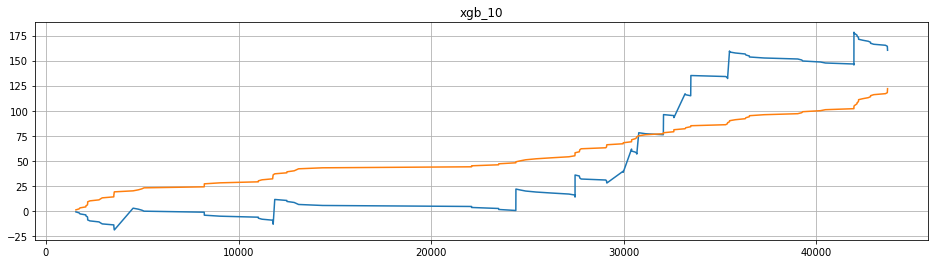

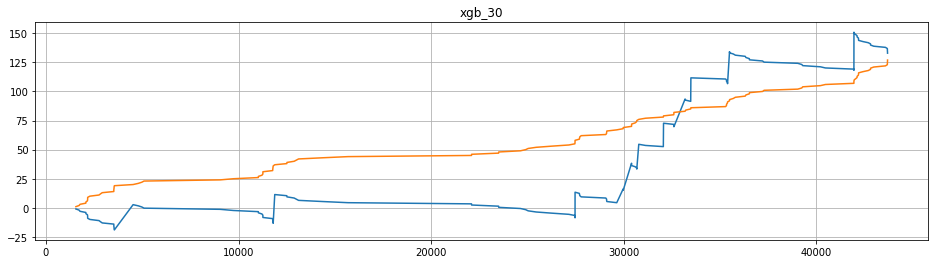

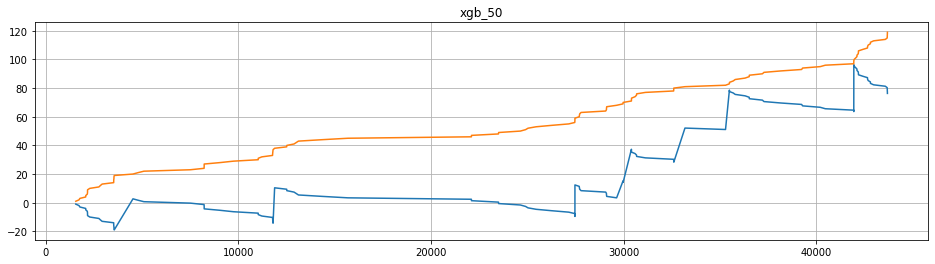

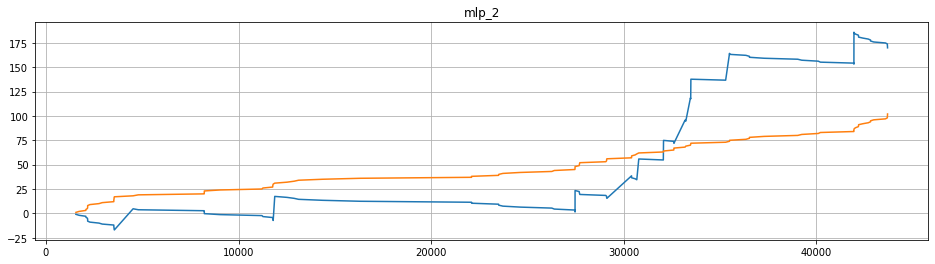

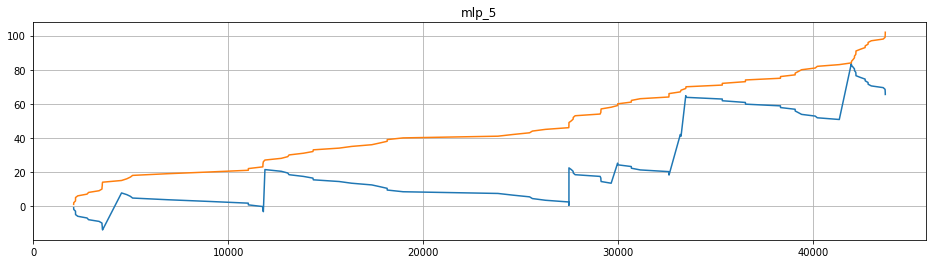

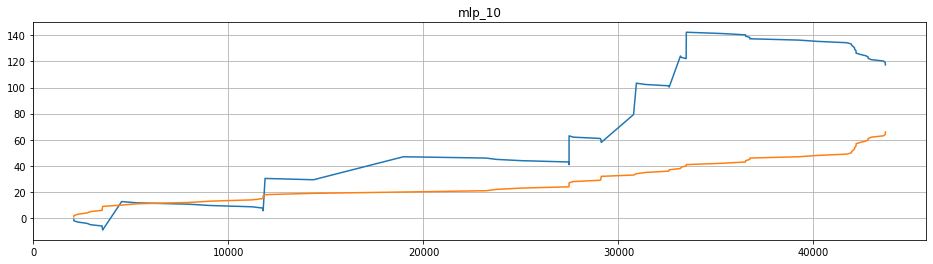

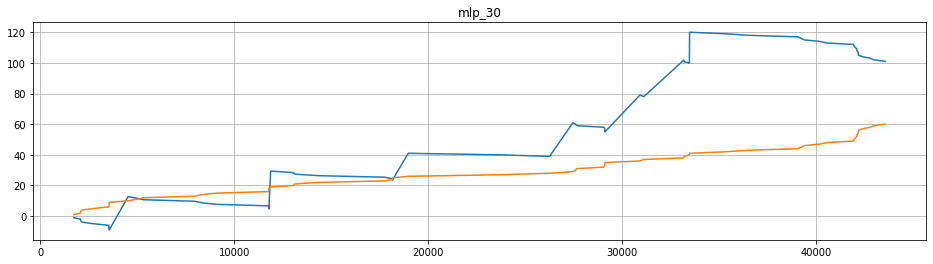

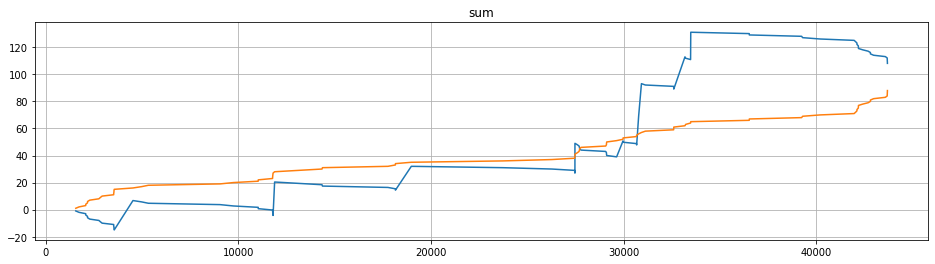

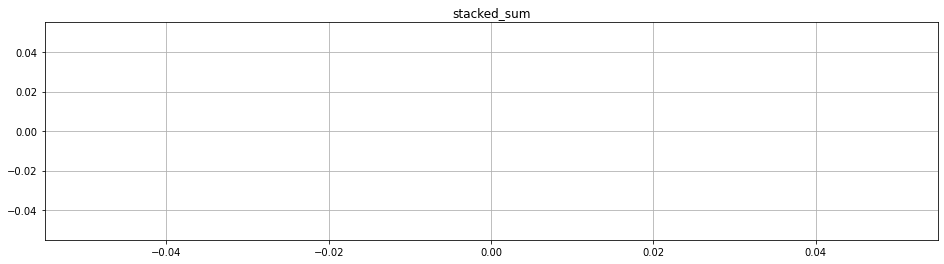

/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


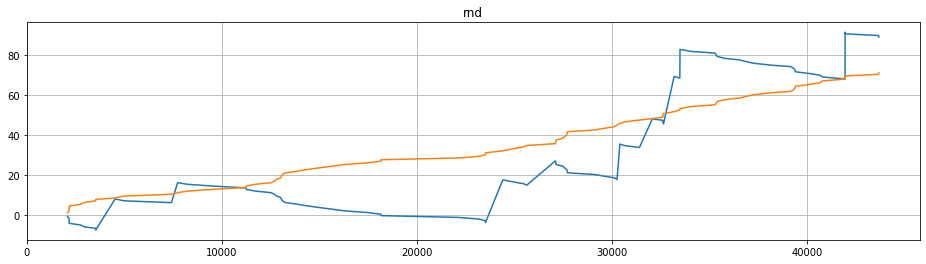

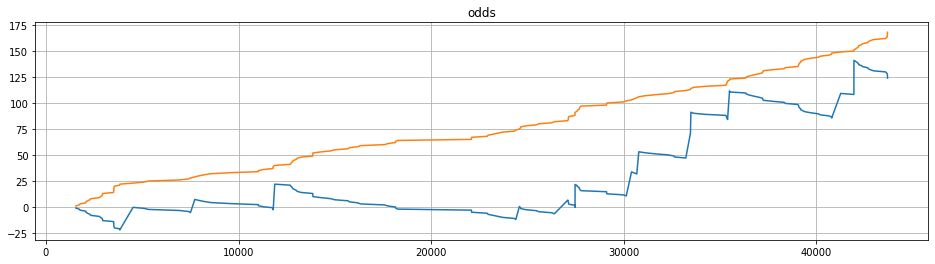

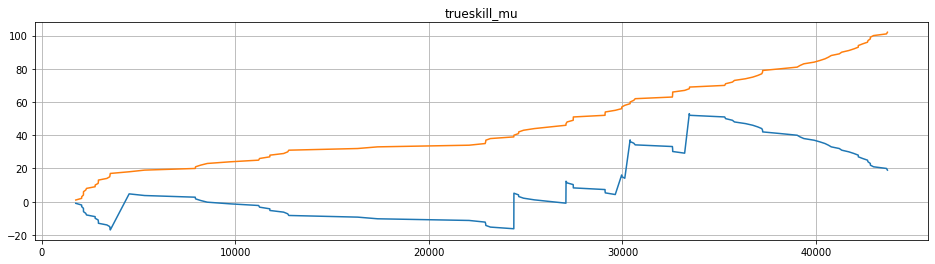

                      r count
xgb_10         1.313934   122
xgb_30         1.046457   127
xgb_50        0.6411765   119
mlp_2          1.665686   102
mlp_5         0.6421569   102
mlp_10         1.777273    66
mlp_30         1.683333    60
sum            1.228409    88
stacked_sum         NaN     0
rnd            1.252025    84
odds             0.7375   168
trueskill_mu  0.1862745   102
HANDICAP_DIVISE


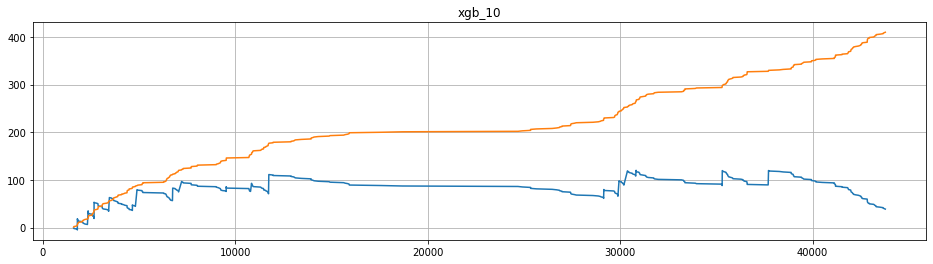

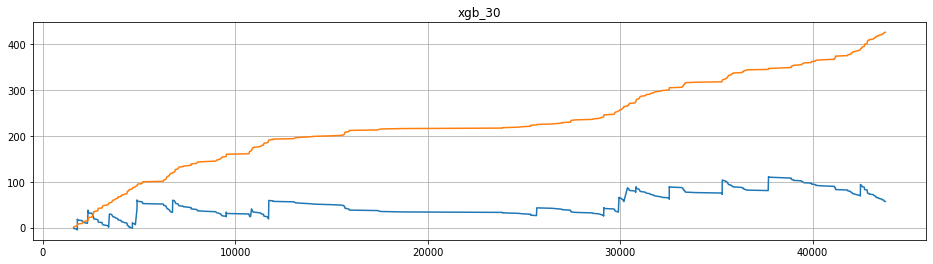

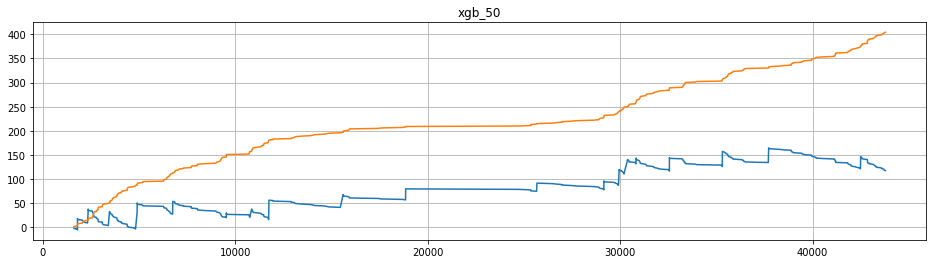

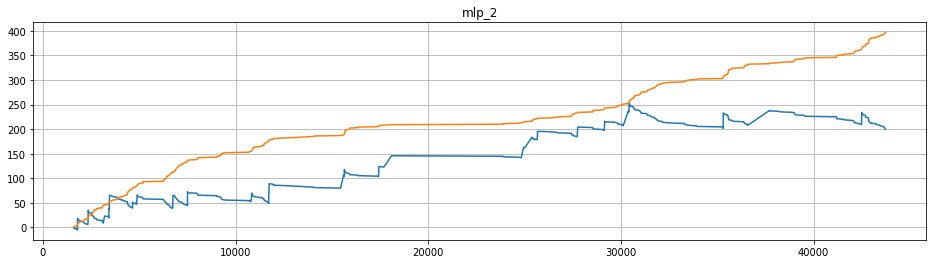

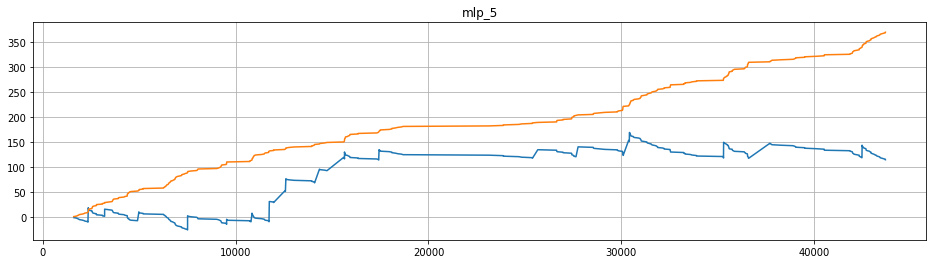

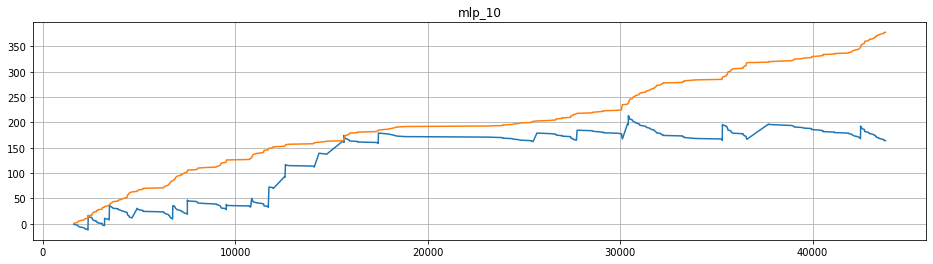

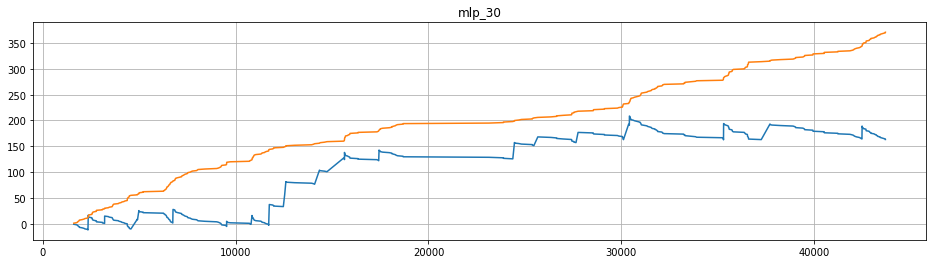

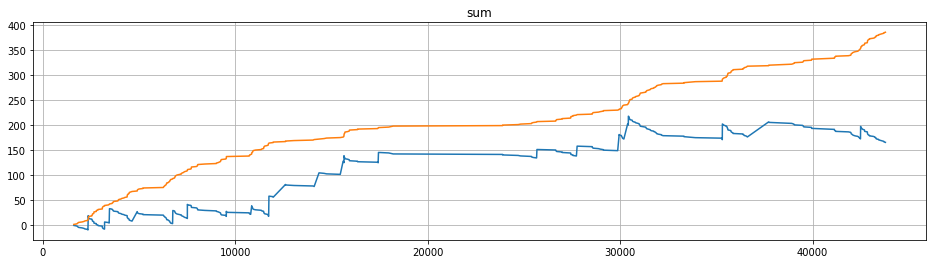

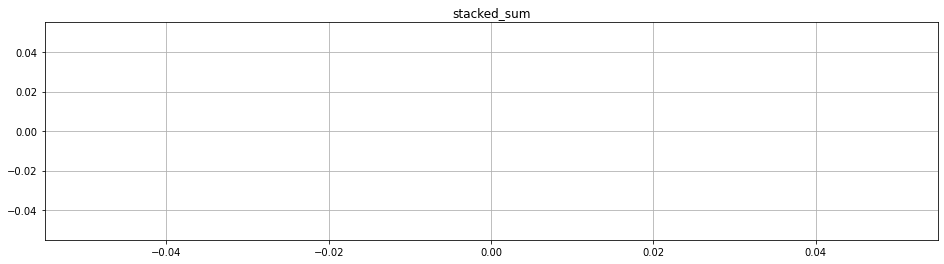

/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


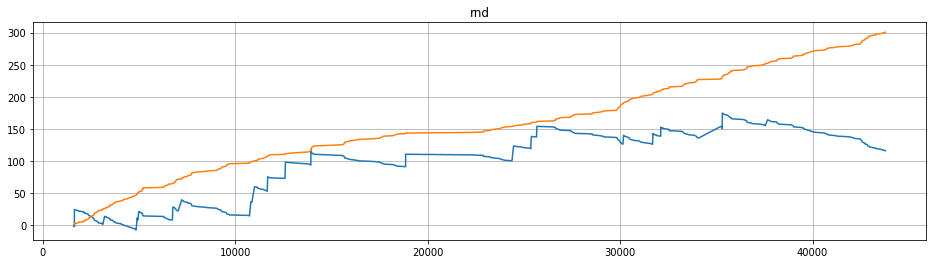

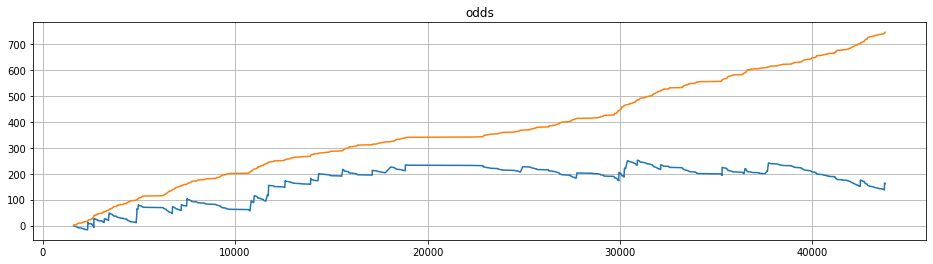

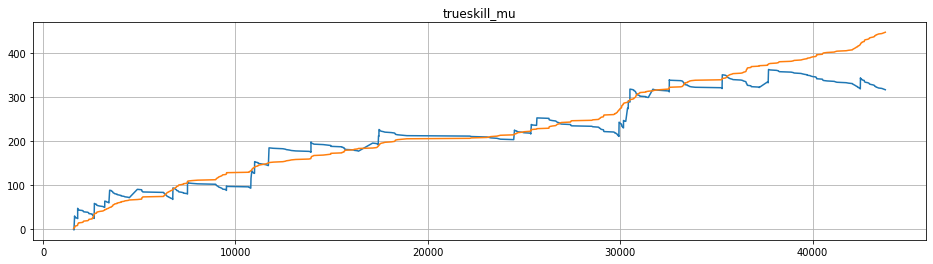

                       r count
xgb_10        0.09439024   410
xgb_30         0.1338028   426
xgb_50         0.2913366   404
mlp_2          0.5040302   397
mlp_5          0.3102981   369
mlp_10         0.4338624   378
mlp_30         0.4398922   371
sum            0.4284974   386
stacked_sum          NaN     0
rnd            0.3868652   355
odds           0.2165997   747
trueskill_mu     0.70783   447


In [24]:
f = 'sub_category'
for s in ['HANDICAP', 'HANDICAP_DIVISE']:
    r = pd.DataFrame(columns=['r', 'bets_mean', 'bets_max', 'bets_min', 'profit_mean', 'profit_max', 'profit_min', 'stash_min', 'stash_max', 'count'], index=[model['name'] for model in models])
    print(s)
    for model in models:
        m = model['name']

        #for c in dd['sub_category'].value_counts().sort_values(ascending=False).index[0:7]:
        #print(c)

        ddd = dd[(dd['category']=='PLAT') & (dd[f]==s)]#dd[(dd['category'].isin(['PLAT'])) & (dd['sub_category'].isin(['HANDICAP'])) ]#dd[(dd['sub_category']==c)]# & (dd['sub_category'].isin(['HANDICAjP_DIVISE', 'HANjDICAP', 'AUTOSTART'])) ]
        #ddd = ddd.groupby('race_id').filter(lambda r: r['pred_{}_1'.format(m)].std() > 0.01)
        #g = ddd[(ddd['n_odds_{}'.format(m)]>=0) & (ddd['pred_{}_1'.format(m)] >= np.quantile(ddd['pred_{}_1'.format(m)], 0.7)) & (ddd['final_odds_ref_offline'].notnull()) & (ddd['final_odds_ref_offline'] > ddd['final_odds_offline']) & (ddd['final_odds_ref'] > 20) & (ddd['final_odds_ref']<50)][['start_at', 'race_id', 'position', 'final_odds', 'final_odds_ref', 'final_odds_ref_unibet', 'final_odds_ref_offline_std', 'final_odds_offline_std', 'profit_{}'.format(m), 'bet_{}'.format(m), 'pred_{}_1'.format(m)]].copy()
        g = ddd[ (ddd['pred_{}_1'.format(m)] > ddd['pred_{}_1'.format(m)].quantile(0.7)) & (ddd['final_odds_ref_offline'] > ddd['final_odds_offline']) & (ddd['final_odds_ref_offline'] > 20) & (ddd['final_odds_ref_offline']<50) & (ddd['final_odds_ref_offline'].notnull())  ][['start_at', 'race_id', 'position', 'final_odds', 'final_odds_ref', 'profit_{}'.format(m), 'bet_{}'.format(m), 'pred_{}_1'.format(m)]].copy()
        g['stash_{}'.format(m)] = g['profit_{}'.format(m)].cumsum()
        g['bets_{}'.format(m)] = g['bet_{}'.format(m)].cumsum()
        g['stash_{}'.format(m)].plot(figsize=(16, 4), title=m)
        g['bets_{}'.format(m)].plot()
        plt.grid(True)
        plt.show()

        #print(m, np.quantile(ddd['pred_{}_1'.format(m)], 0.7), ddd['start_at'].min(), ddd['start_at'].max())

        r.loc[m]['r'] = g['profit_{}'.format(m)].sum() / g['bet_{}'.format(m)].sum()
        r.loc[m]['bets_mean'] = g['bet_{}'.format(m)].mean()
        r.loc[m]['bets_min'] = g['bet_{}'.format(m)].min()
        r.loc[m]['bets_max'] = g['bet_{}'.format(m)].max()
        r.loc[m]['profit_mean'] = g['profit_{}'.format(m)].mean()
        r.loc[m]['profit_min'] = g['profit_{}'.format(m)].min()
        r.loc[m]['profit_max'] = g['profit_{}'.format(m)].max()
        r.loc[m]['stash_min'] = g['stash_{}'.format(m)].min()
        r.loc[m]['stash_max'] = g['stash_{}'.format(m)].max()
        r.loc[m]['count'] = g['stash_{}'.format(m)].count()

    print(r[['r', 'count']])


In [ ]:
def bet(df):
    models = [{"name":'mlp_30'}]
    
    def fast_bet(r):
        for model in models:
            p = 'pred_{}_1'.format(model['name'])
            #print(model['name'], df['pred_{}_1'.format(model['name'])].mean())
            s = r.sort_values(by=p)
            o = s.index.sort_values(ascending=True, return_indexer=True)
            s2 = r.sort_values(by='final_odds_ref')
            o2 = s2.index.sort_values(ascending=True, return_indexer=True)


            idx = (r[p] == r[p].max())
        #idx = (r['pred_knn_5_1'] > 0) & (r['final_odds_ref'] > 5)
        #idx = (r['pred_knn_5_1'] > 0.) & (r['final_odds_ref'] > 5) & (r['final_odds_ref'] < 30)
            #if r[p].std() == 0:
            #    r['bet'] = 0
            #    return r
            r['bet_{}'.format(model['name'])] = np.clip(r[p], a_min=0., a_max=1.) #((idx).astype('float'))


            r['n_{}'.format(model['name'])] = o[1]
            r['n_odds_{}'.format(model['name'])] = o2[1]
        return r
    
    df = df[(df['country']=='FRA') & (df['sub_category'].isin(['HANDICAP', 'HANDICAP_DIVISE']))].copy()
    df = df.groupby('race_id').apply(fast_bet)

    for model in models:
        m = model['name']
        #dd['profit_{}'.format(m)] = np.clip(dd['pred_{}_1'.format(m)], a_min=0., a_max=10.) * 1.0 * (dd['target_returns']-1.0)
        #dd['profit_{}'.format(m)] = 1.0 * (dd['target_returns']-1.0)
        df['bet_{}'.format(m)] = np.ceil(0.1 * np.clip((df['pred_{}_1'.format(m)]/10.), a_min=0., a_max=10.) * np.log(df['n_odds_{}'.format(m)]+1.) )
        df['profit_{}'.format(m)] = df['bet_{}'.format(m)] * 1.0 * (df['target_returns']-1.0)

    df['bet'] = df[['bet_{}'.format(model['name']) for model in models]].sum(axis=1)
    df['profit'] = df[['profit_{}'.format(model['name']) for model in models]].sum(axis=1)
    df['target'] = 'mlp_30_1'
    
    bets = df[(df['pred_mlp_30_1'] >= 13.6) & (df['final_odds_ref_offline']>df['final_odds_offline']) & (df['final_odds_ref'] > 20) & (df['final_odds_ref']<50)][['race_id', 'start_at', 'bet', 'category', 'sub_category', 'country', 'target', 'profit', 'num', 'race_id', 'position', 'final_odds_ref', 'final_odds', 'profit_{}'.format(m), 'bet_{}'.format(m), 'pred_{}_1'.format(m)]].copy()
    bets['date'] = pd.to_datetime(bets['start_at'])
    
    #bets = bets.set_index(bets['date'])
    #bets = bets.sort_index()
    
    bets['bets'] = bets['bet'].cumsum()
    bets['stash'] = bets['profit'].cumsum()

    return bets

In [ ]:
#bets = bet(df, program.model.features, program.model.categorical_features, 
#    N=1, max_odds=30, break_on_bet=True, break_on_odds=False, 
#    targets=['pred_rnd_1', 'final_odds_ref', 'pred_sum_1'] + ['pred_{}_{}'.format(model['name'], i+1) for i in range(program.model.params['n_targets']) for model in program.model.models]# + ['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models] 
#   )   

In [ ]:
bets = bet(df)

In [ ]:
#bets = bets.set_index(bets['date'])
#bets = bets.sort_index()

In [ ]:
bets['target'] = 'fg'
list(bets.columns)

In [ ]:
def graph_bb(bb, f):
    results = []

    for s in bb[f].value_counts().index:
        results = []
        x = bb[ (bb[f] == s)  ].copy()
        if len(x) == 0:
            continue
        #print("---\n{}\t{:+.2f}\t{:+.2f}\t{:+.2f}\n---".format(s, x['profit'].sum(), x['bet'].sum(), len(x)))

        fig, axs = plt.subplots(1,1)

        for t in x['target'].value_counts().index:
            bbb = x[(x['target'] == t)].copy()
            #bbb = bbb[ (bbb['pred']>bbb['pred'].quantile(0.85)) ].copy()
            
            if 'profit_placed' not in list(bbb.columns):
                bbb['profit_placed'] = 0

            results.append({
                'idx_1': s,
                'idx_2': t,
                'profit': bbb.profit.sum(),
                'profit_place': bbb.profit_placed.sum(),
                'bet': bbb.bet.sum(),
                'bets': bbb.bet.count(),
                'avg': bbb.profit.sum() / bbb.bet.sum()
            })

            '''
            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            fig, axs = plt.subplots(1,1)
            bbb['stash'].plot(figsize=(6, 2))
            bbb['cbet'].plot(figsize=(6, 2))
            plt.show()
            '''

            #print("{:10s}: \t {:+.2f} \t {:+.0f} \t {:+.2f}".format(t, bbb.profit.sum(), bbb.profit.count(), bbb.profit.mean()) )

            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            bbb['stash'].plot(figsize=(10, 2))
            #bbb['cbet'].plot(figsize=(10, 2))

        results = pd.DataFrame(results)
        results = results.set_index(['idx_1', 'idx_2'])
        print(results.sort_values(by='avg', ascending=False))


        plt.show()
        

In [ ]:
graph_bb(bets, 'country')

In [ ]:
#countries = list(bets['country'].value_counts()[0:10].index)
#sub_categories = list(bets['sub_category'].value_counts()[0:10].index)

#%store countries
#%store sub_categories

In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

target = 'pred_knn_1_1'

c_min = bets[(bets['target'] == target)]['pred'].min()
c_mean = bets[(bets['target'] == target)]['pred'].mean()
c_max = bets[(bets['target'] == target)]['pred'].max()

space = [
          Real(1, 10, name='min_odds'),
          Real(10, 60, name='max_odds'),
          Real(c_min, c_mean, name='min_pred'),
          Real(c_mean, c_max, name='max_pred'),
          Integer(5, 25, name='max_players')] + [
          Integer(0,1, name='country_{}'.format(country)) for country in countries] + [
          Integer(0,1, name='sub_category_{}'.format(sub_category)) for sub_category in sub_categories] + [
          Integer(0,1, name='nb_{}'.format(n)) for n in range(0,6)]
         
def x_to_params(x):
    params = {}
    
    params['min_odds'] = x[0]
    params['max_odds'] = x[1]
    params['max_pred'] = x[3]
    params['min_pred'] = x[2]
    params['max_players'] = x[4]
    
    for i, country in enumerate(countries):
        params['country_{}'.format(country)] = x[5+i]
        
    for i, sc in enumerate(sub_categories):
        params['sub_category_{}'.format(sc)] = x[5+len(countries)+i]
        
    for n in range(0,6):
        params['nb_{}'.format(n)] = x[5+len(countries)+len(sub_categories)+n]

    return params

@use_named_args(space)
def f(**params):
    return ff(params)
    
def ff(params, train=True):
    
    print(params)
    
    b = bets[ (bets['pred'] != 0) & (bets['target']==target) & (bets['pred_std'] != 0)]
    
    b = b[ (b['odds_ref'] > params['min_odds']) & (b['odds_ref'] < params['max_odds']) & (b['declared_player_count'] > 1) & (b['declared_player_count'] <= params['max_players']) ]
    
    #b = b[(b['pred'] >= params['min_pred']) & (b['pred'] <= params['max_pred'])]
    
    for country in countries:
        if params['country_{}'.format(country)] == 0:
            b = b[ b['country'] != country ]
            
    for sub_category in sub_categories:
        if params['sub_category_{}'.format(sub_category)] == 0:
            b = b[ b['sub_category'] != sub_category ]
            
    for n in range(0,6):
        if params['nb_{}'.format(n)] == 0:
            b = b[ b['nb'] != n]
    
    p = b.profit.sum()
    pp = len(b[b['profit'] > 0])
    bet = b.bet.sum()
    
    print("{:+.2f} {:+.2f}\n".format(p, bet))
        
    if bet == 0:
        return 0
    
    if not train:
        return b
    
    return - (p)
    
    

In [ ]:
#c_mean, c_min, c_max

In [ ]:
#from skopt import dummy_minimize, gp_minimize, gbrt_minimize

#res = dummy_minimize(f, space, n_calls=500)

In [ ]:
#x_to_params(res.x), res.fun

In [ ]:
#params = x_to_params(res.x)
#%store params
#params

In [ ]:
#%store -r params
#%store -r countries
#%store -r sub_categories

In [ ]:
#bb = ff(params, False)

In [ ]:
#bb = bets[(bets['pred'] > 1.) & (bets['next_pred_1'] != bets['next_pred_2'])]
#bb = bets[(bets['pred_std'] < 0.1) & (bets['pred'] < 1.)]
#bb = bets[ (bets['odds_ref'] > 1) & (bets['odds_ref'] < 30) & (bets['pred'] > 1) & (bets['target'] == 'pred_xgb_100_1') ]
#graph_bb( bb[bb['target']=='pred_knn_1_1'], 'category')
#graph_bb( bets, 'category')

In [ ]:
bets = bets.iloc[:,~bets.columns.duplicated()]

In [ ]:
#bb = bets[(bets['sub_category']=='HANDICAP') & (bets['country'] != 'FRA')]
#bb = bb[(bb['pred_mlp_10_1']>118) & (bb['final_odds_ref']>=bb['final_odds'])].copy()
bb = bets
bb['stash'] = bb.profit.cumsum()
bb['stash'].plot(figsize=(12,4))

In [ ]:
# to save the program when the model looks good, call: program.lock('2020-03-03')

# a copy of the program, model and dataset class will be created

# after this, open the new program class in *ml/pipeline/programs* and update the `model_params` in the `run` function

# add any additional bet filter and bet strategy to the program bet function

# add the new program to the better command *pmu/management/commands/bet.py*: programs = ['2020-03-03']

In [ ]:
program.lock('position_prediction')